<a href="https://colab.research.google.com/github/pockypoem/ai-projects/blob/main/DecisionTree_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Iris (csv)

In [55]:
import numpy as np
import pandas as pd
from sklearn import tree

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
df = pd.read_csv("/content/drive/My Drive/dataset/data-iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,7.00,3.02,4.07,1.04,Iris-versicolor
1,2,6.04,3.02,4.05,1.05,Iris-versicolor
2,3,6.09,3.01,4.09,1.05,Iris-versicolor
3,4,5.05,2.03,4.00,1.03,Iris-versicolor
4,5,6.05,2.08,4.06,1.05,Iris-versicolor


In [58]:
df.tail(9)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,92,6.09,3.01,5.01,2.03,Iris-virginica
92,93,5.08,2.07,5.01,1.09,Iris-virginica
93,94,6.08,3.02,5.09,2.03,Iris-virginica
94,95,6.07,3.03,5.07,2.05,Iris-virginica
95,96,6.07,3.00,5.02,2.03,Iris-virginica
96,97,6.03,2.05,5.00,1.09,Iris-virginica
97,98,6.05,3.00,5.02,2.00,Iris-virginica
98,99,6.02,3.04,5.04,2.03,Iris-virginica
99,100,5.09,3.00,5.01,1.08,Iris-virginica


In [59]:
df.shape

(100, 6)

In [34]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [35]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.828200,2.492200,4.504600,1.328600
std,29.011492,0.682243,0.476052,0.828199,0.445877
min,1.000000,4.090000,2.000000,3.000000,1.000000
25%,25.750000,5.080000,2.070000,4.037500,1.030000
50%,50.500000,6.030000,2.090000,4.090000,1.060000
75%,75.250000,6.070000,3.002500,5.052500,2.000000
max,100.000000,7.090000,3.080000,6.090000,2.050000


In [36]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
# mengubah kelas (kolom "Species") dari String ke Unique-Integer

df["Species"] = pd.factorize(df.Species)[0]

In [61]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,7.00,3.02,4.07,1.04,0
1,2,6.04,3.02,4.05,1.05,0
2,3,6.09,3.01,4.09,1.05,0
3,4,5.05,2.03,4.00,1.03,0
4,5,6.05,2.08,4.06,1.05,0


In [62]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
95,96,6.07,3.00,5.02,2.03,1
96,97,6.03,2.05,5.00,1.09,1
97,98,6.05,3.00,5.02,2.00,1
98,99,6.02,3.04,5.04,2.03,1
99,100,5.09,3.00,5.01,1.08,1


Iris-setosa : 0 <br>
Iris-virginica: 1

In [63]:
# hapus kolom "Id"

df = df.drop(labels="Id", axis=1)

In [64]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,7.00,3.02,4.07,1.04,0
1,6.04,3.02,4.05,1.05,0
2,6.09,3.01,4.09,1.05,0
3,5.05,2.03,4.00,1.03,0
4,6.05,2.08,4.06,1.05,0


In [65]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,0.372102,0.709930,0.398166,0.445772
SepalWidthCm,0.372102,1.000000,0.365902,0.421105,0.268544
PetalLengthCm,0.709930,0.365902,1.000000,0.636250,0.777382
PetalWidthCm,0.398166,0.421105,0.636250,1.000000,0.667205
Species,0.445772,0.268544,0.777382,0.667205,1.000000


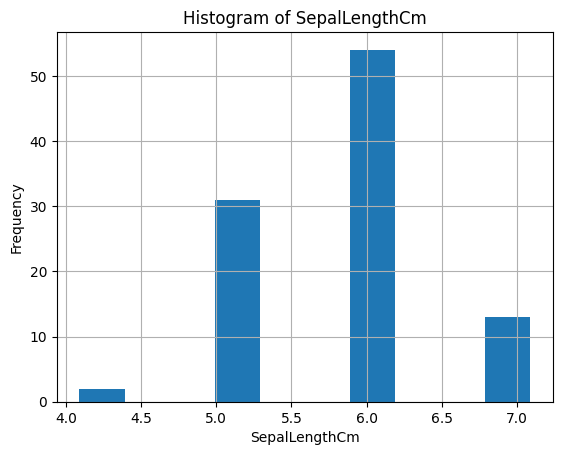

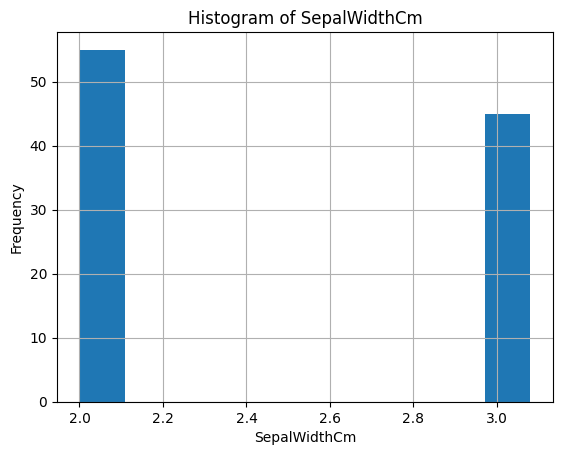

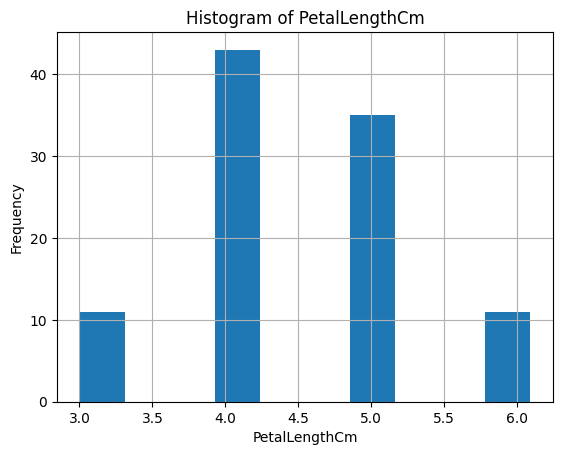

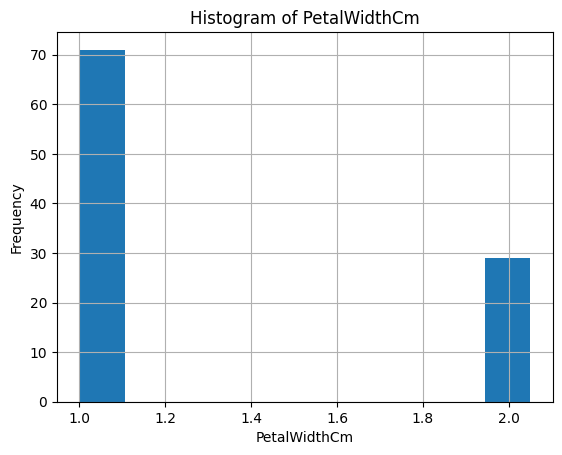

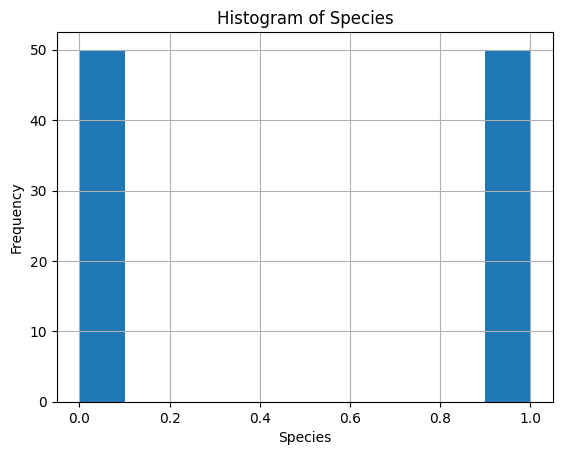

In [66]:

# create historgam plot to see the frequency distribution clearly

for column in df.columns:
    df[column].hist()

    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

**Visualisasi Seaborn**

<Axes: >

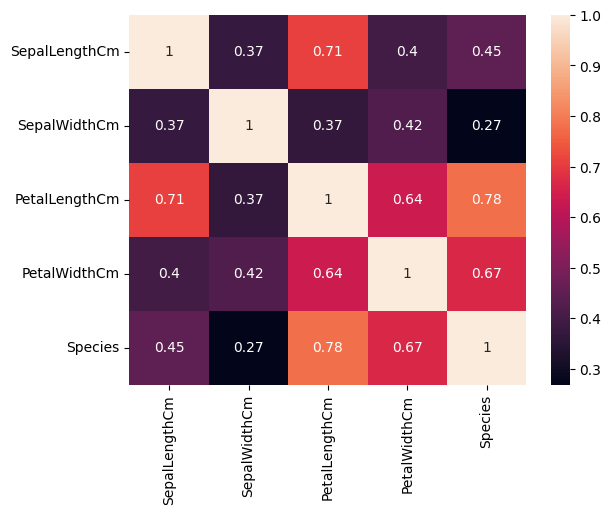

In [43]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True)

In [44]:
# change dataframe (df) ke array Numpy
# untuk memudahkan proses operasi matriks dalam python

df = df.to_numpy()

In [45]:
df

array([[7.  , 3.02, 4.07, 1.04, 0.  ],
       [6.04, 3.02, 4.05, 1.05, 0.  ],
       [6.09, 3.01, 4.09, 1.05, 0.  ],
       [5.05, 2.03, 4.  , 1.03, 0.  ],
       [6.05, 2.08, 4.06, 1.05, 0.  ],
       [5.07, 2.08, 4.05, 1.03, 0.  ],
       [6.03, 3.03, 4.07, 1.06, 0.  ],
       [4.09, 2.04, 3.03, 1.  , 0.  ],
       [6.06, 2.09, 4.06, 1.03, 0.  ],
       [5.02, 2.07, 3.09, 1.04, 0.  ],
       [5.  , 2.  , 3.05, 1.  , 0.  ],
       [5.09, 3.  , 4.02, 1.05, 0.  ],
       [6.  , 2.02, 4.  , 1.  , 0.  ],
       [6.01, 2.09, 4.07, 1.04, 0.  ],
       [5.06, 2.09, 3.06, 1.03, 0.  ],
       [6.07, 3.01, 4.04, 1.04, 0.  ],
       [5.06, 3.  , 4.05, 1.05, 0.  ],
       [5.08, 2.07, 4.01, 1.  , 0.  ],
       [6.02, 2.02, 4.05, 1.05, 0.  ],
       [5.06, 2.05, 3.09, 1.01, 0.  ],
       [5.09, 3.02, 4.08, 1.08, 0.  ],
       [6.01, 2.08, 4.  , 1.03, 0.  ],
       [6.03, 2.05, 4.09, 1.05, 0.  ],
       [6.01, 2.08, 4.07, 1.02, 0.  ],
       [6.04, 2.09, 4.03, 1.03, 0.  ],
       [6.06, 3.  , 4.04,

In [46]:
# Split Dataset
# 80 baris untuk training dan 20 baris data untuk testing

dataTraining = np.concatenate((df[0:40, :], df[50:90, :]), axis = 0)
dataTesting = np.concatenate((df[40:50, :], df[90:100, :]), axis = 0)

In [47]:
dataTraining.shape

(80, 5)

In [48]:
dataTesting.shape

(20, 5)

In [49]:
# Memecah dataset ke input dan label

inputTraining = dataTraining[:, 0:4]
inputTesting = dataTesting[:, 0:4]
labelTraining = dataTraining[:, 4]
labelTesting = dataTesting[:, 4]

**Modelling**

In [50]:
model = tree.DecisionTreeClassifier()

In [51]:
model = model.fit(inputTraining, labelTraining)

In [52]:
# memprediksi input Data Testing

hasilPrediksi = model.predict(inputTesting)
print("Label Sebenarnya: ", labelTesting)
print("Hasil Prediksi: ", hasilPrediksi)

Label Sebenarnya:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Hasil Prediksi:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [53]:
#Menghitung Akurasi

prediksiBenar = (hasilPrediksi == labelTesting).sum()
prediksiSalah = (hasilPrediksi != labelTesting).sum()
print("Prediksi Benar :", prediksiBenar, "data")
print("Prediksi Salah :", prediksiSalah, "data")
print("Akurasi :", prediksiBenar/(prediksiBenar+prediksiSalah) * 100, "%")

Prediksi Benar : 20 data
Prediksi Salah : 0 data
Akurasi : 100.0 %
